# London Cycle Hire


https://data.london.gov.uk/dataset/number-bicycle-hires

Heathrow monthly weather data https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt


variables
number of bicycle hires
day of the week
time of the year
weather

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
daily = pd.read_csv('data/tfl-daily-cycle-hires-daily.csv', skiprows=1, names=('day','hires'))
monthly = pd.read_csv('data/tfl-daily-cycle-hires-monthly.csv', skiprows=1, names=('month','hires'))

In [23]:
daily['datetime'] = pd.to_datetime(daily['day'], format='%d/%m/%Y')
daily['day-of-week'] = daily['datetime'].dt.day_name()
daily

,day,hires,datetime,day-of-week
0,30/07/2010,6897,2010-07-30,Friday
1,31/07/2010,5564,2010-07-31,Saturday
2,01/08/2010,4303,2010-08-01,Sunday
3,02/08/2010,6642,2010-08-02,Monday
4,03/08/2010,7966,2010-08-03,Tuesday
5,04/08/2010,7893,2010-08-04,Wednesday
6,05/08/2010,8724,2010-08-05,Thursday
7,06/08/2010,9797,2010-08-06,Friday
8,07/08/2010,6631,2010-08-07,Saturday
9,08/08/2010,7864,2010-08-08,Sunday


In [32]:
monthly['datetime'] = pd.to_datetime(monthly['month'], format='%b-%y')
monthly['month-of-year'] = monthly['datetime'].dt.month_name()
monthly

,month,hires,datetime,month-of-year
0,Jul-10,12461,2010-07-01,July
1,Aug-10,341203,2010-08-01,August
2,Sep-10,540859,2010-09-01,September
3,Oct-10,544412,2010-10-01,October
4,Nov-10,456304,2010-11-01,November
5,Dec-10,285574,2010-12-01,December
6,Jan-11,403178,2011-01-01,January
7,Feb-11,398292,2011-02-01,February
8,Mar-11,556155,2011-03-01,March
9,Apr-11,673639,2011-04-01,April


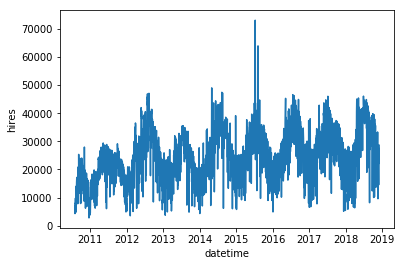

In [25]:
sns.lineplot(x='datetime', y='hires', data=daily)

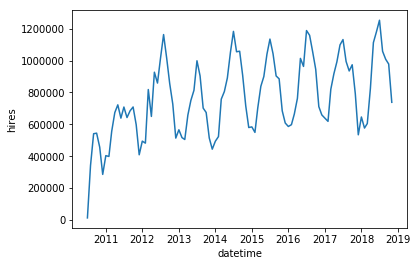

In [31]:
sns.lineplot(x='datetime', y='hires', data=monthly)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


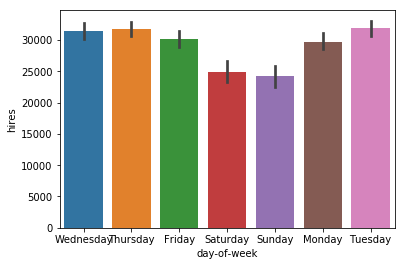

In [28]:
sns.barplot(x='day-of-week', y='hires', data =daily[2000:3000])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


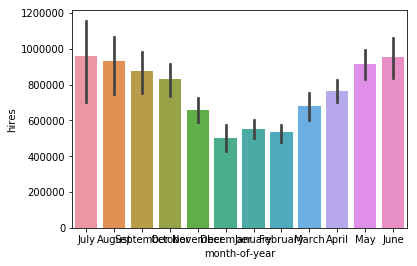

In [33]:
sns.barplot(x='month-of-year', y='hires', data = monthly)